In [3]:
import os
import cv2
import numpy as np
import glob
from xml.dom import minidom
import xml.etree.ElementTree as ET
import xml.dom.minidom as md
from matplotlib import pyplot as plt

In [4]:
PATH='./ccpd2020' # каталог с ccpd2020 из https://github.com/detectRecog/CCPD

In [5]:
tich_file=[]
fil1=[]
folder_tich = []
for i in os.walk(PATH):
    folder_tich.append(i)


for i in folder_tich:
    for j in i[2]:
            if j.find('.jpg')>-1:
                tich_file.append(i[0]+'/'+j)
                fil1.append(j)
print(len(tich_file))

11776


In [5]:
for i in range(len(tich_file)):
    img_name=fil1[i]
    img_name1=tich_file[i]
    path = img_name1  # <userID> is the logged in userID.  

    img = cv2.imread(path, 1)
    razmer=img.shape
    iname = img_name.rsplit('/', 1)[-1].rsplit('.', 1)[0].split('-')
    [leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')] 





    data = ET.Element('annotation')
    folder = ET.SubElement(data, 'folder')

    filename = ET.SubElement(data, 'filename')
    path = ET.SubElement(data, 'path')
    source = ET.SubElement(data, 'source')
    database = ET.SubElement(source, 'database')
    size = ET.SubElement(data, 'size')
    width = ET.SubElement(size, 'width')
    height = ET.SubElement(size, 'height')
    depth = ET.SubElement(size, 'depth')
    segmented = ET.SubElement(data, 'segmented')
    object1 = ET.SubElement(data, 'object')
    name = ET.SubElement(object1, 'name')
    pose = ET.SubElement(object1, 'pose')
    truncated = ET.SubElement(object1, 'truncated')
    difficult = ET.SubElement(object1, 'difficult')
    # difficult = ET.SubElement(object1, 'difficult')
    bndbox=ET.SubElement(object1, 'bndbox')
    xmin=ET.SubElement(bndbox, 'xmin')
    ymin=ET.SubElement(bndbox, 'ymin')
    xmax=ET.SubElement(bndbox, 'xmax')
    ymax=ET.SubElement(bndbox, 'ymax')
    xmin.text=str(leftUp[0])
    ymin.text=str(leftUp[1])
    xmax.text=str(rightDown[0])
    ymax.text=str(rightDown[1])

    difficult.text='0'
    truncated.text='0'
    pose.text='Unspecified'
    name.text='number'
    segmented.text='0'
    depth.text=str(razmer[2])
    width.text=str(razmer[1])
    height.text=str(razmer[0])
    database.text='Unknown'
    path.text=img_name1
    folder.text='train'
    filename.text=img_name

    xmlstr = ET.tostring(data).decode('utf-8')
    # newxml = md.parse(xmlstr)
    newxml = md.parseString(xmlstr)
    namxml=img_name1.replace('.jpg','.xml')
    with open(namxml,'w') as outfile:
        outfile.write(newxml.toprettyxml(indent='\t',newl='\n'))

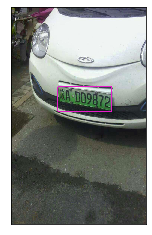

In [9]:
i=8
img_name=fil1[i]
img_name1=tich_file[i]
path = img_name1  # <userID> is the logged in userID.  
img = cv2.imread(path, 1)
razmer=img.shape
iname = img_name.rsplit('/', 1)[-1].rsplit('.', 1)[0].split('-')
[leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')] 

path = img_name1  # <userID> is the logged in userID.  


img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
iname = img_name.rsplit('/', 1)[-1].rsplit('.', 1)[0].split('-')
# [leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')]  
cv2.rectangle(img2, (leftUp[0], leftUp[1]), (rightDown[0], rightDown[1]), (230, 29, 201), thickness=3)

plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()